<a href="https://colab.research.google.com/github/Teddyy27/SVM-Parameter_Optimization/blob/main/SVM-Wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
wine_data = fetch_ucirepo(id=186)
X_all = wine_data.data.features
y_all = wine_data.data.targets.squeeze().astype(int)  # convert to int classes

In [3]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt


In [4]:
kernelList = ['linear', 'poly', 'rbf', 'sigmoid']
overall_results = []
best_overall_accuracy = 0
best_sample_log = None

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import random as r
import pandas as pd

# Prepare a list to store the results for each sample
overall_results = []

# Initialize variables for tracking the best overall accuracy and corresponding parameters
best_overall_accuracy = 0
best_sample_log = None

kernelList = ['gini', 'entropy']  # Not used for RandomForest, but included for reference

for sample_no in range(10):
    # Split the dataset into training and testing sets
    X_train_full, X_test, y_train_full, y_test = train_test_split(
        X_all, y_all, test_size=0.3, random_state=sample_no)

    # Select only 50 rows for training
    X_train = X_train_full.sample(n=50, random_state=sample_no)
    y_train = y_train_full.loc[X_train.index]

    # Reset index if needed
    X_train = X_train.reset_index(drop=True)
    y_train = y_train.reset_index(drop=True)

    # Initialize best accuracy and corresponding parameters
    bestAccuracy = 0
    bestNEstimators = 0
    bestMaxDepth = 0
    bestMinSamplesSplit = 0
    iteration_log = []

    # Optimization loop for 100 iterations
    for i in range(100):
        # Randomly choose hyperparameters for the RandomForest model
        n_estimators = r.randint(50, 200)  # Random number of trees in forest
        max_depth = r.randint(1, 20)  # Random max depth of each tree
        min_samples_split = r.randint(2, 20)  # Random minimum samples for splitting a node

        try:
            # Initialize the model with the chosen parameters
            model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, random_state=sample_no)
            model.fit(X_train, y_train)
            preds = model.predict(X_test)
            acc = accuracy_score(y_test, preds) * 100  # Calculate accuracy
        except:
            acc = 0  # In case of errors, set accuracy to 0

        # Update the best accuracy and parameters if current model performs better
        if acc > bestAccuracy:
            bestAccuracy = acc
            bestNEstimators = n_estimators
            bestMaxDepth = max_depth
            bestMinSamplesSplit = min_samples_split

        # Log the progress every 10 iterations
        if i % 10 == 0:
            iteration_log.append({
                'Iteration': i,
                'Fitness (bestAccuracy)': round(bestAccuracy, 4),
                'bestNEstimators': bestNEstimators,
                'bestMaxDepth': bestMaxDepth,
                'bestMinSamplesSplit': bestMinSamplesSplit,
                'sample_no': sample_no
            })

    # Store the results for the current sample
    overall_results.append({
        'Sample': sample_no,
        'BestAccuracy': round(bestAccuracy, 4),
        'N_Estimators': bestNEstimators,
        'MaxDepth': bestMaxDepth,
        'MinSamplesSplit': bestMinSamplesSplit
    })

    # Update the best overall accuracy and sample log if needed
    if bestAccuracy > best_overall_accuracy:
        best_overall_accuracy = bestAccuracy
        best_sample_log = pd.DataFrame(iteration_log)

# Display the results in a table
results_df = pd.DataFrame(overall_results)
results_df.to_csv('optimization_results.csv', index=False)



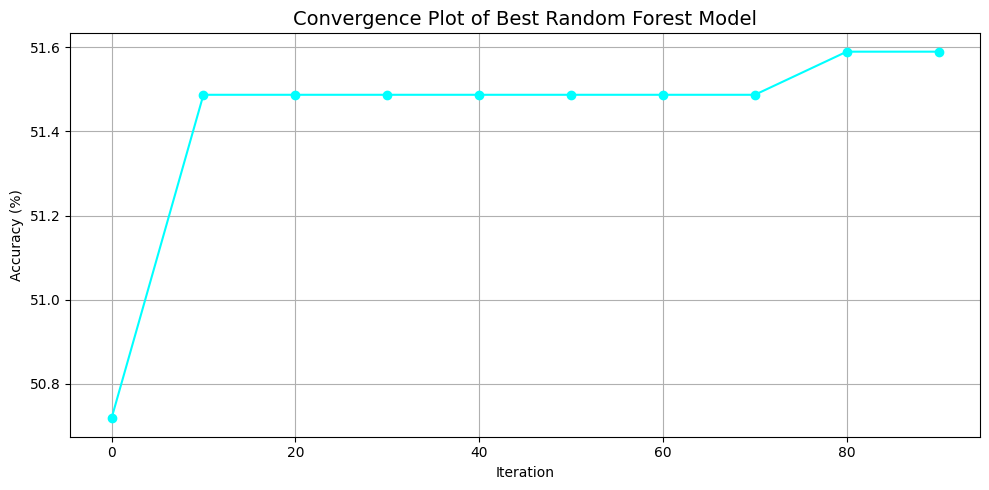

In [9]:
plt.figure(figsize=(10, 5))
plt.plot(best_sample_log['Iteration'], best_sample_log['Fitness (bestAccuracy)'], marker='o', linestyle='-', color='cyan')
plt.title('Convergence Plot of Best Random Forest Model', fontsize=14)
plt.xlabel('Iteration')
plt.ylabel('Accuracy (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [10]:
# Check if the best sample log is available
if best_sample_log is not None:
    # Print accuracy for each iteration
    print("Iteration-wise Accuracy:")
    for index, row in best_sample_log.iterrows():
        print(f"Iteration {row['Iteration']} - Accuracy: {row['Fitness (bestAccuracy)']:.2f}%")
else:
    print("No best sample log available.")


Iteration-wise Accuracy:
Iteration 0.0 - Accuracy: 50.72%
Iteration 10.0 - Accuracy: 51.49%
Iteration 20.0 - Accuracy: 51.49%
Iteration 30.0 - Accuracy: 51.49%
Iteration 40.0 - Accuracy: 51.49%
Iteration 50.0 - Accuracy: 51.49%
Iteration 60.0 - Accuracy: 51.49%
Iteration 70.0 - Accuracy: 51.49%
Iteration 80.0 - Accuracy: 51.59%
Iteration 90.0 - Accuracy: 51.59%
